In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

<br><br><br><br>
# Required input

In [2]:
vol = "Kilauea"

<br><br><br><br>

In [3]:
# Constructing file paths
good_df_fn = "data/" + vol + "/good_df.csv"
data_cube_fn = "data/" + vol + "/image_series.csv"
numpy_fn = 'data/' + vol + '/numpy_data_cube.npy'

# Import data table with file names and Temp. above background
good_df = pd.read_csv(good_df_fn)
good_df.head()

,Unnamed: 0,X,nighttime_volcano_files,quality,dates,color,T_above_back
0,211,211,processed/AST_L1T_00304112000085817_2017080807...,u,2000-04-11,red,2.963148
1,255,255,processed/AST_L1T_00305062000085224_2017080807...,y,2000-05-06,black,8.357309
2,296,296,processed/AST_L1T_00305222000085147_2017080806...,y,2000-05-22,black,10.130923
3,332,332,processed/AST_L1T_00306072000085155_2017080806...,y,2000-06-07,black,8.264691
4,351,351,processed/AST_L1T_00306142000085801_2017080806...,y,2000-06-14,black,8.337190


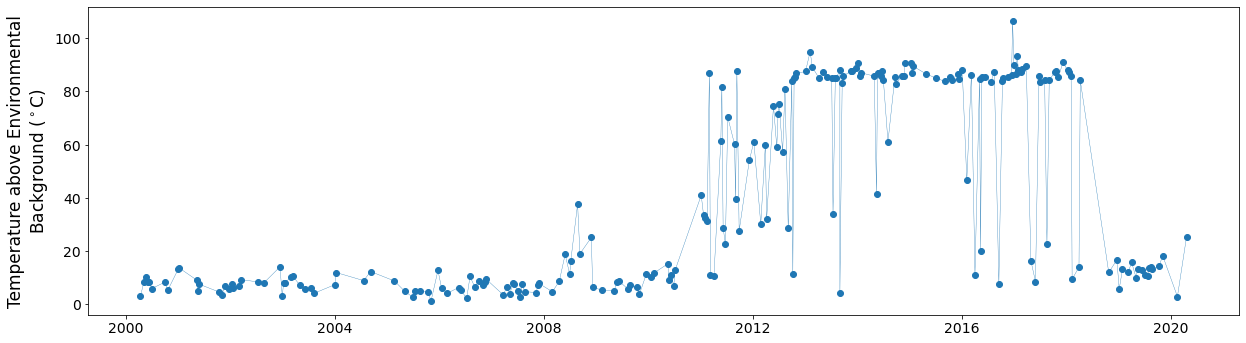

In [4]:
# Plotting that data table

# Formatting dates
formatted_dates = [datetime.strptime(date, '%Y-%m-%d') for date in good_df['dates']]

# Plotting the time series of temperature above background
plt.figure(figsize = [11*15/8, 8.5*2/3])
plt.plot_date(formatted_dates,
              good_df['T_above_back'],
              linestyle = '-',
              linewidth = 1/3,
              marker = 'o')
plt.ylabel('Temperature above Environmental\nBackground ($^\circ$C)', fontsize = 17)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14);

In [5]:
# Import the data cube's table
data_cube = pd.read_csv(data_cube_fn)

# Set up the dimensions of the array
data_cube_array = np.zeros([max(data_cube['Var1']),
                            max(data_cube['Var2']),
                            max(data_cube['Var3']),
                            max(data_cube['Var4'])])

# Fill in the array
count = 0
for i in range(len(data_cube)):
    
    # Grabbing all the indices from the table
    i1 = data_cube['Var1'][i] - 1
    i2 = data_cube['Var2'][i] - 1
    i3 = data_cube['Var3'][i] - 1
    i4 = data_cube['Var4'][i] - 1
    
    # Storing the value at those indices
    data_cube_array[i1, i2, i3, i4] = data_cube['value'][i]
    
    # Printing progress since this isnt very fast
    percent_done = i / len(data_cube)
    if ((percent_done - count) >= 0.05):
        print('Percent to complete: ' + str(percent_done) + '!')
        count += 0.05

Percent to complete: 0.05!
Percent to complete: 0.1!
Percent to complete: 0.1500000956008321!
Percent to complete: 0.20000009560083212!
Percent to complete: 0.2500000956008321!
Percent to complete: 0.30000009560083213!
Percent to complete: 0.3500000956008321!
Percent to complete: 0.4!
Percent to complete: 0.45!
Percent to complete: 0.5!
Percent to complete: 0.55!
Percent to complete: 0.6!
Percent to complete: 0.65!
Percent to complete: 0.7000000956008321!
Percent to complete: 0.7500000956008321!
Percent to complete: 0.8000000956008321!
Percent to complete: 0.8500000956008321!
Percent to complete: 0.9000000956008322!
Percent to complete: 0.9500000956008321!


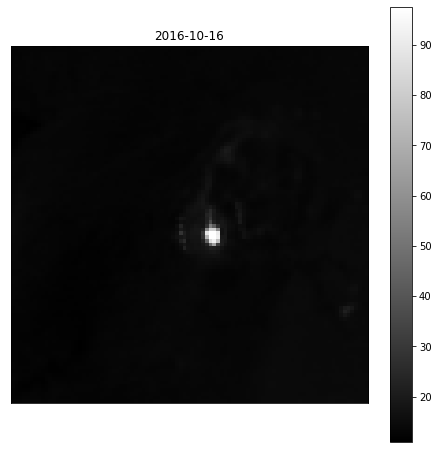

In [6]:
# Visualize band 12 at a random point in time

# Selecting random point in time
date_index = np.random.choice(data_cube_array.shape[0])
                 
# Plotting
plt.figure(figsize = [8, 8])
plt.imshow(data_cube_array[date_index, 3, :, :], cmap = 'gist_gray')
plt.title(good_df['dates'][date_index])
plt.colorbar()
plt.xticks([])
plt.yticks([]);

In [7]:
# Exporting so that this data is readily available in numpy in the future
np.save(numpy_fn, data_cube_array)